In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
#  create the dataset
np.random.seed(42) # random number only generate

# create dataset

data = {
    'product_id' : range(1,21),
    'product_name' : [f'Product{i}' for i in range(1,21)],
    'category' : np.random.choice(['Electronic', 'Clothing', 'Home', 'Sports'], 20),
    'units_sold' : np.random.poisson(lam=20, size=20),
    'sales_date' : pd.date_range (start = '2023-01-01', periods=20, freq='D')
}

sales_data = pd.DataFrame(data)

# display the dataset

print('Sales Data:')
print(sales_data)


Sales Data:
    product_id product_name    category  units_sold sales_date
0            1     Product1        Home          25 2023-01-01
1            2     Product2      Sports          15 2023-01-02
2            3     Product3  Electronic          17 2023-01-03
3            4     Product4        Home          19 2023-01-04
4            5     Product5        Home          21 2023-01-05
5            6     Product6      Sports          17 2023-01-06
6            7     Product7  Electronic          19 2023-01-07
7            8     Product8  Electronic          16 2023-01-08
8            9     Product9        Home          21 2023-01-09
9           10    Product10    Clothing          21 2023-01-10
10          11    Product11        Home          17 2023-01-11
11          12    Product12        Home          22 2023-01-12
12          13    Product13        Home          14 2023-01-13
13          14    Product14        Home          17 2023-01-14
14          15    Product15      Sports    

In [5]:
# save the dataframe to a csv file

sales_data.to_csv('sales_data.csv', index=False)

In [6]:
import os
os.getcwd()

'c:\\Users\\Sanket kshirsagar\\OneDrive\\Desktop\\Stats'

In [9]:
# Descriptive Statistics

descriptive_stats = sales_data['units_sold'].describe()

print("\nDescriptive_statistics for Units Sold:")
print(descriptive_stats)

mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean', 'std']).reset_index()

# display result

print('\n Statistical Analysys:')
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance Units Sold: {variance_sales}")
print(f"Standard Deviation Units Sold: {std_deviation_sales}")
print("\nCategory Statistics")
print(category_stats)
      

                                    



Descriptive_statistics for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

 Statistical Analysys:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Variance Units Sold: 10.90526315789474
Standard Deviation Units Sold: 3.3023117899275864

Category Statistics
     category  sum       mean       std
0    Clothing   21  21.000000       NaN
1  Electronic   73  18.250000  2.217356
2        Home  181  20.111111  3.723051
3      Sports  101  16.833333  2.714160


In [10]:
# Inferential statistics

confidence_level = 0.95

degrees_freedom = len(sales_data['units_sold']) -1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# t-score

t_score = stats.t.ppf((1 + confidence_level) /2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\n Confidence Interval for Mean of Units Sold")
print(confidence_interval)



 Confidence Interval for Mean of Units Sold
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [12]:
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\n Hypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

if p_value < 0.05:
    print('Reject the null hypothesis: The mean units sold id different from 20')
else:
    print('Fail to reject the null hypothesis: The mean units sold is not different from 20')






 Hypothesis Testing (t-test):
T-statistic: -1.6250928099424466, p-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not different from 20


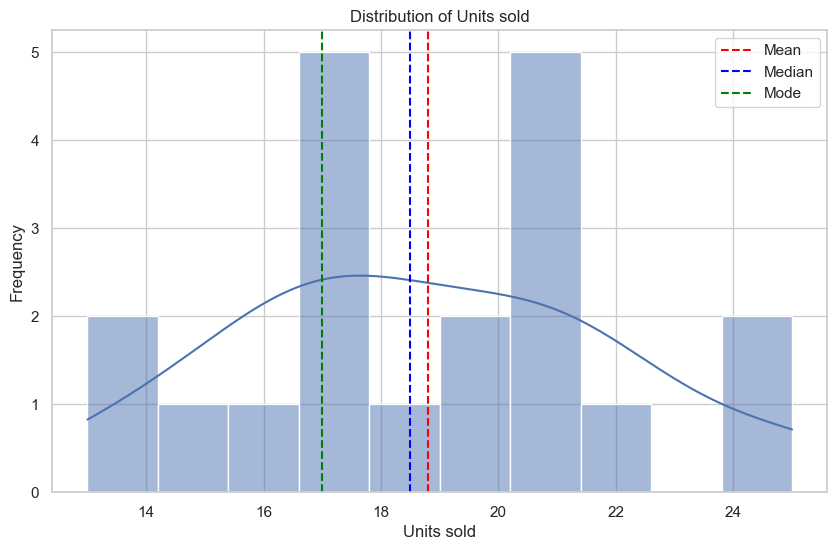

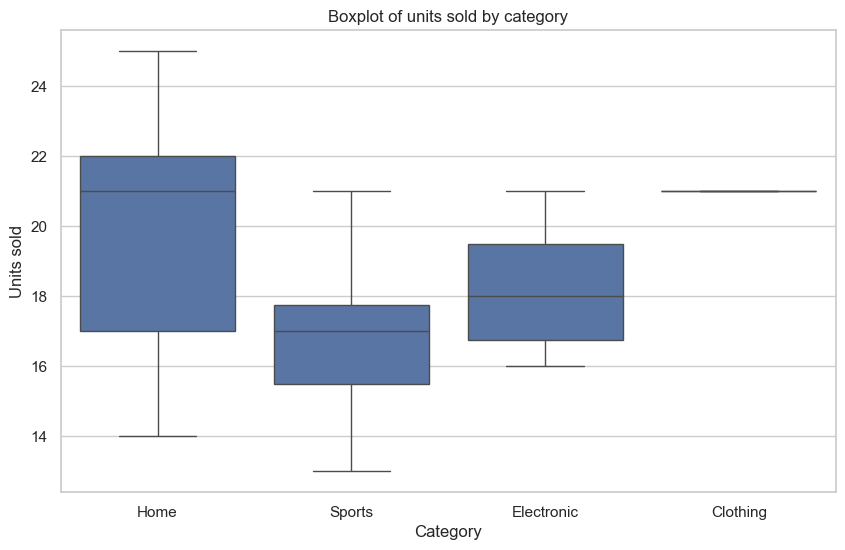

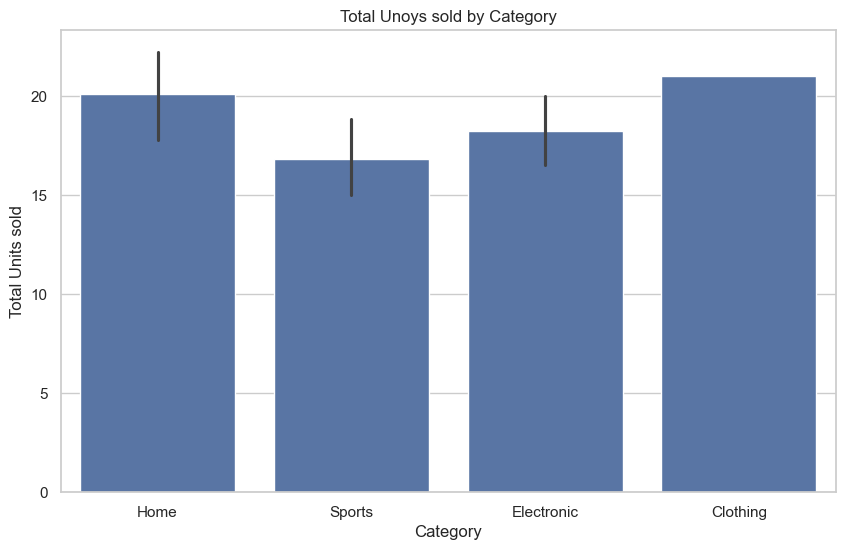

In [28]:
# visualization
sns.set(style = 'whitegrid')

#plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'], bins=10, kde = True)
plt.title('Distribution of Units sold')
plt.xlabel('Units sold')
plt.ylabel('Frequency')
plt.axvline (mean_sales, color = 'red',  linestyle = '--', label = 'Mean')
plt.axvline (median_sales, color = 'blue',  linestyle = '--', label = 'Median')
plt.axvline (mode_sales, color = 'green',  linestyle = '--', label = 'Mode')
plt.legend()
plt.show()

#Boxplot for units sold by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y= 'units_sold', data = sales_data)
plt.title('Boxplot of units sold by category')
plt.xlabel('Category')
plt.ylabel('Units sold')
plt.show()

#Bar plot for total units sold by category
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='units_sold', data=sales_data)
plt.title('Total Unoys sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units sold')
plt.show()

 